# Análisis de componentes principales

Una de las aplicaciones de PCA es la reducción de dimensionalidad (variables), perdiendo la menor cantidad de información (varianza) posible: cuando contamos con un gran número de variables cuantitativas posiblemente correlacionadas (indicativo de existencia de información redundante), PCA permite reducirlas a un número menor de variables transformadas (componentes principales) que expliquen gran parte de la variabilidad en los datos. Cada dimensión o componente principal generada por PCA será una combinación lineal de las variables originales, y serán además independientes o no correlacionadas entre sí.

In [1]:
# Importamos las librerías necesarias
import pandas as pd  # Para manipulación de datos
import numpy as np  # Para operaciones numéricas
from sklearn.decomposition import PCA  # Para el análisis de componentes principales
from sklearn.datasets import load_wine  # Conjunto de datos 'wine'
from sklearn.preprocessing import StandardScaler  # Para normalizar los datos
import matplotlib.pyplot as plt  # Para visualización
import seaborn as sns  # Para gráficos más estilizados
import tensorflow as tf
from tensorflow import keras
!sudo pip3 install keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

El conjunto de datos `df` contiene información sobre diferentes vinos. Incluye características químicas de cada vino (como los
niveles de alcohol, ácido málico, cenizas, alcalinidad de las cenizas, magnesio, etc.)
Adicionalmente, la columna 'target' codifica la clase o tipo de vino al que pertenece cada muestra.  
Clase 0: Vinos de la primera región (denominados como "0")

Clase 1: Vinos de la segunda región (denominados como "1")

Clase 2: Vinos de la tercera región (denominados como "2")

In [2]:
# Cargamos el conjunto de datos 'wine'
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
# Verificar los  valores únicos de target
df['target'].unique()

array([0, 1, 2])

Para encontrar el máximo, minimo, media, desviación estandar, entre otros descriptivos estadsticos podemos utilizar la función .describe () aplicada a todo el data frame. Encuentre, imprima y redacte un parrafo con la descripción estadistica de df.



In [4]:
# Descripción del dataset
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
# Exploramos el conjunto de datos
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
# red neuronal para el dataset df

# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(df.shape[1]-1,))) # Capa de entrada con 64 neuronas
model.add(Dense(32, activation='relu')) # Capa oculta con 32 neuronas
model.add(Dense(3, activation='softmax')) # Capa de salida con 3 neuronas (para las 3 clases)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Preparar los datos
X = df.drop('target', axis=1)
y = to_categorical(df['target'])

# Entrenar el modelo
model.fit(X, y, epochs=100, batch_size=32, verbose=1) # Ajustar los parámetros según sea necesario

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2850 - loss: 38.9524
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3221 - loss: 18.9196 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3078 - loss: 9.1428 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2771 - loss: 5.3898 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3183 - loss: 4.6973 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4171 - loss: 2.2360 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5072 - loss: 1.3745 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.7207 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.6417 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7515 - loss: 0.5582 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6553 - loss: 0.8275 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7801 - loss: 0.5239 


#La Matriz de confusión
Es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


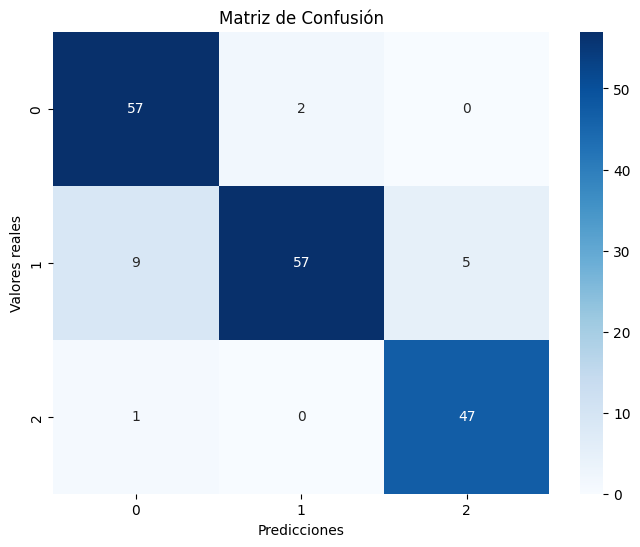

In [8]:
# matriz de confusión

from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo
y_pred = model.predict (X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(df['target']), yticklabels=np.unique(df['target']))
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [10]:
# Exactitud, sensibilidad, especificidad y la precisión

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtener las predicciones del modelo
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y, axis=1)

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')  # Usar average='weighted' para multiclase
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Calcular la especificidad
tn = conf_matrix[0,0]
fp = conf_matrix[0,1] + conf_matrix[0,2]
fn = conf_matrix[1,0] + conf_matrix[2,0]
tp = conf_matrix[1,1] + conf_matrix[2,2]
specificity = tn / (tn + fp)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Sensibilidad (Recall): {recall}")
print(f"Especificidad: {specificity}")
print(f"F1-score: {f1}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Exactitud: 0.9044943820224719
Precisión: 0.9110778964850826
Sensibilidad (Recall): 0.9044943820224719
Especificidad: 0.9661016949152542
F1-score: 0.9031600609128699


In [15]:
# Gráficos de dispersión de las variables cuantitativas
sns.pairplot(df, hue='target', vars=df.columns[:-1])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

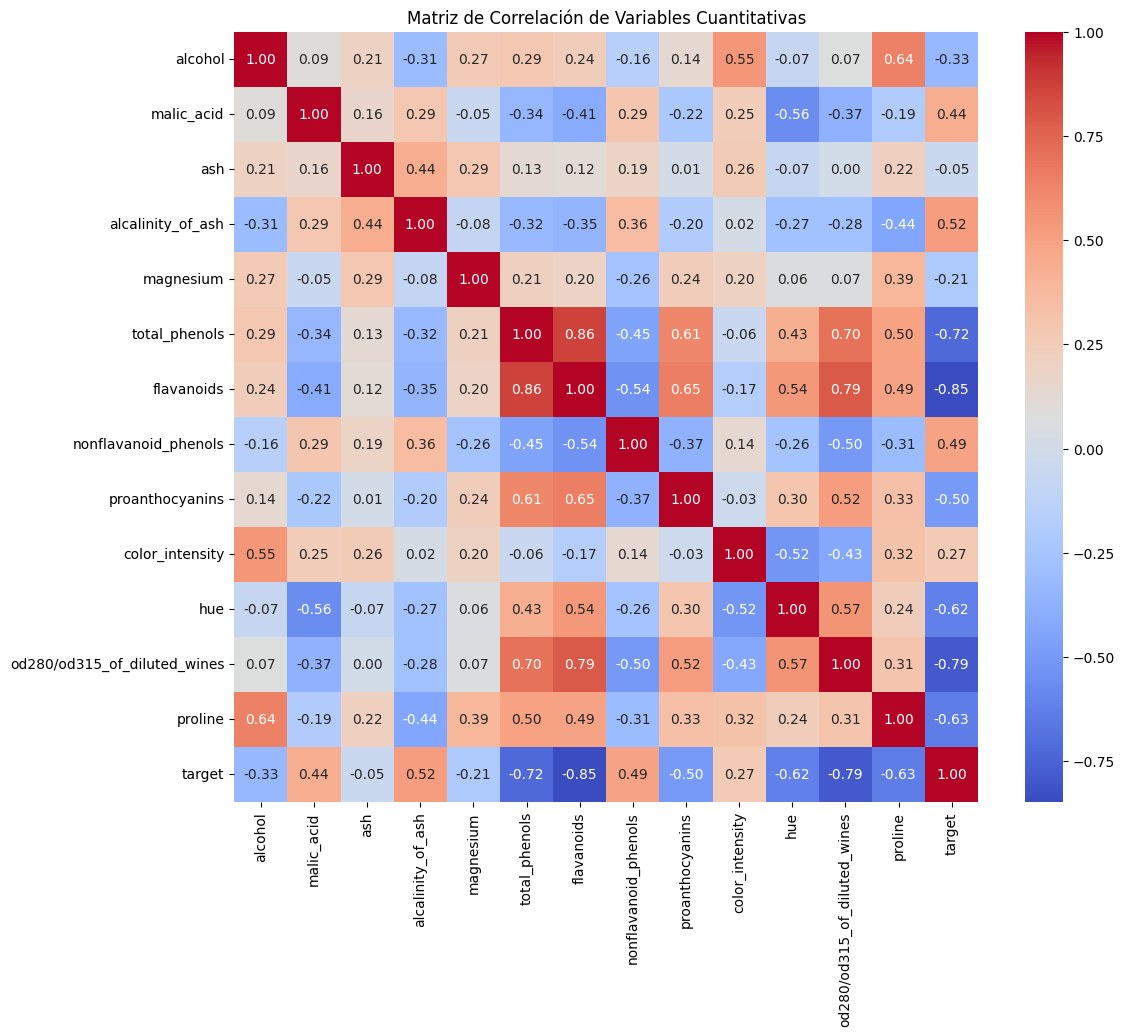

In [12]:
# matriz de correlación de las variables cuantitativas de df
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor de la matriz de correlación con colores
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Cuantitativas')
plt.show()

## Normalización de datos
La normalización de datos es un paso clave en el análisis de componentes principales (PCA) porque ayuda a que todas las características (o variables) del conjunto de datos tengan la misma importancia en el análisis.

La normalización, en este caso con StandardScaler, toma cada variable y:

Le resta su media (promedio), para centrarla en 0.
La división por su desviación estándar, para que la mayoría de sus valores queden en el rango de -1 a 1 aproximadamente.

In [13]:
# Normalizamos los datos para evitar que características con mayores magnitudes dominen el PCA
X = df.drop('target', axis=1)  # Seleccionamos solo las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Crear un nuevo DataFrame con los datos normalizados
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Agregar la columna 'target' al nuevo DataFrame
df_scaled['target'] = df['target']

# Mostrar las primeras filas del nuevo DataFrame
print(df_scaled.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  target  
0         0.251717  0.362177                      1.847920  1.013009       0  
1        -0.

In [16]:
# realiza el gráfico de dispersión del nuevo dataset normalizado

sns.pairplot(df_scaled, hue='target', vars=df.columns[:-1])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

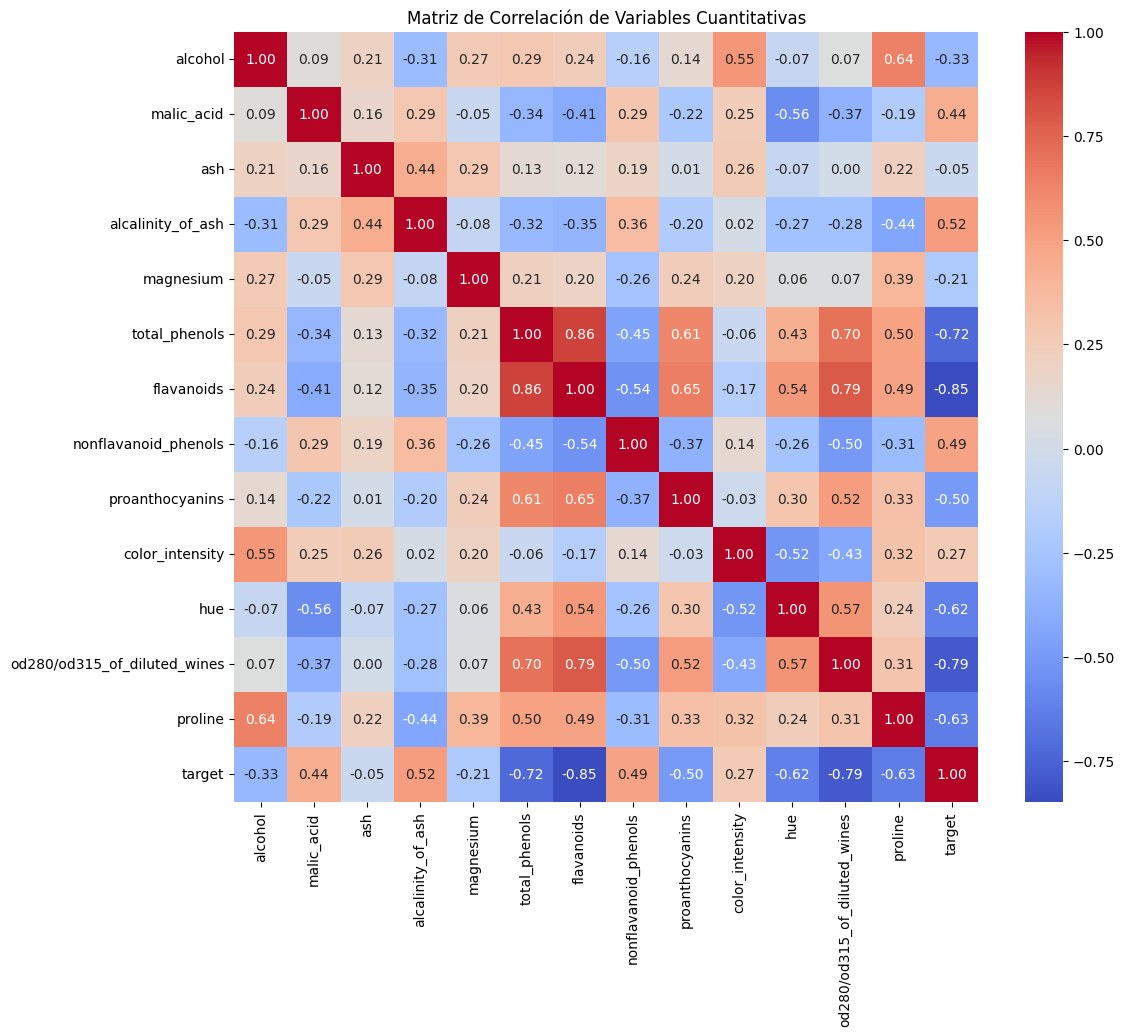

In [17]:
# realiza la matriz de correlación del nuevo dataset normalizado

correlation_matrix = df_scaled.corr()

# Crear el mapa de calor de la matriz de correlación con colores
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Cuantitativas')
plt.show()

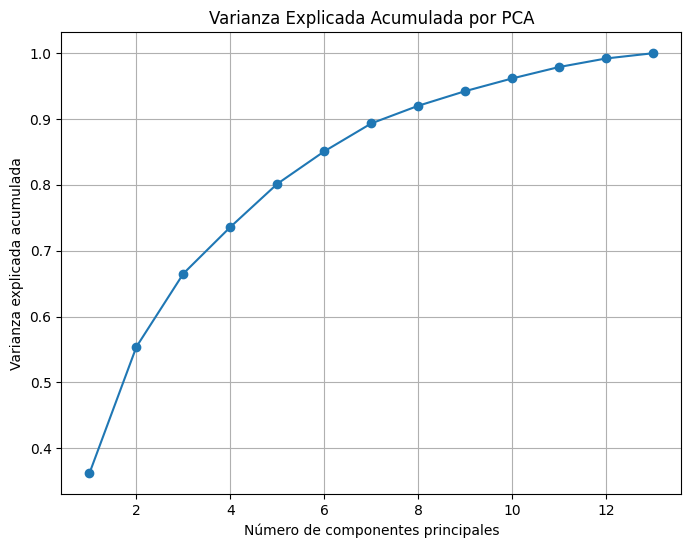

El número de componentes ideal para PCA es: 10


In [18]:
# Escogemos la cantidad de componentes ideal para PCA

# Aplicamos PCA
pca = PCA()
pca.fit(X_scaled)

# Calculamos la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Calculamos la varianza explicada acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Graficamos la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza Explicada Acumulada por PCA')
plt.grid(True)
plt.show()

# Elegimos el número de componentes que expliquen al menos un 95% de la varianza
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"El número de componentes ideal para PCA es: {n_components}")

In [ ]:
# cambia la varianza explicada a la que tu desees y encuentra el número de componentes ideal


In [ ]:
# Ver el porcentaje de participción de cada variable en las componentes


In [ ]:
# Convertir  en dataframe las componentes principales

# Aplicamos PCA con el número de componentes seleccionado
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

# Convertir las componentes principales a un DataFrame de pandas
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Agregar la columna 'target' al DataFrame de componentes principales
df_pca['target'] = df['target']

# Mostrar las primeras filas del DataFrame de componentes principales
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10  target  
0 -0.065139 -0.641443  1.020956       0  
1 -1.024416  0.308847  0.159701       0  
2  0.344216  1.177834  0.113361       0  
3 -0.643593 -0.052544  0.239413       0  
4 -0.416700 -0.326819 -0.078366       0  


In [ ]:
# red neuronal con df_pca

# Definir el modelo de red neuronal con df_pca
model_pca = Sequential()
model_pca.add(Dense(64, activation='relu', input_shape=(df_pca.shape[1]-1,))) # Capa de entrada
model.add(Dense(32, activation='tanh')) # Capa oculta con 32 neuronas
model_pca.add(Dense(3, activation='softmax')) # Capa de salida

# Compilar el modelo
model_pca.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Preparar los datos
X_pca = df_pca.drop('target', axis=1)
y_pca = to_categorical(df_pca['target'])

# Entrenar el modelo
model_pca.fit(X_pca, y_pca, epochs=100, batch_size=32, verbose=1) # Ajustar parámetros si es necesario

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6578 - loss: 0.8962  
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7052 - loss: 0.8351 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - loss: 0.7617 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.6915 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8338 - loss: 0.6519 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8898 - loss: 0.5812 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8979 - loss: 0.5507 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9193 - loss: 0.5272 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9499 - loss: 0.4854 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.4794 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 0.4439 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9651 - loss: 0.4148 


In [ ]:
# Crea la matriz de confusión y compara


In [ ]:
# Agrega más capas ocultas o neuronas


In [ ]:
# Cambia las funciones de activación


In [ ]:
# Cambia el optimizador
